# MuNRa / Cosmic Watch — Exploratory Data Analysis (EDA)

## Context
This notebook analyzes real data acquired from a MuNRa / Cosmic Watch muon detector.
The goal is to understand the structure and behavior of each recorded variable
before assigning any physical meaning.

## Methodological rules
- Raw data is never modified.
- Only the processed and frozen dataset is used.
- Column names remain neutral (`col_0` … `col_9`) until evidence supports renaming.
- Functional patterns are analyzed before any physical interpretation.

## Dataset freeze reference
The analysis below uses the frozen dataset:

- File: `data/processed/munra_clean.csv`
- Rows: 304
- Columns: 10
- SHA256: `19c0d351b225d36d8db308fe854d66255aa5b2ac97907978959d27b511d8d564`


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

DATA_PATH = Path("../data/processed/munra_clean.csv")

df = pd.read_csv(DATA_PATH)

df.shape, df.columns.tolist()
df.head()


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
0,38,14086,82,680,0.6,72983.7,29.4,41853,0,COSMIC
1,39,14318,85,1921,1.1,72983.7,29.4,5474,0,COSMIC
2,42,14701,140,3144,1.9,72984.7,29.4,5489,0,COSMIC
3,43,15231,80,1557,0.9,72982.0,29.4,41814,0,COSMIC
4,44,15858,79,881,0.6,72984.7,29.4,41862,0,COSMIC


In [12]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
col_0,304.0,191.486842,87.924284,38.0,115.75,191.50,267.25,343.0
col_1,304.0,68149.325658,33790.223636,14086.0,37898.75,66690.00,98903.50,126498.0
col_2,304.0,144.279605,271.648732,76.0,80.00,85.00,114.00,3962.0
col_3,304.0,2101.661184,1028.084030,602.0,1245.50,1912.00,2911.75,4095.0
col_4,304.0,5.375987,56.114482,0.5,0.80,1.05,1.60,953.6
col_5,304.0,72989.208224,2.775618,72982.0,72986.80,72989.30,72991.00,72998.0
col_6,304.0,29.410197,0.030311,29.4,29.40,29.40,29.40,29.5
col_7,304.0,32657.851974,30376.918905,5301.0,5525.75,41574.00,41747.25,149430.0
col_8,304.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.0


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_0   304 non-null    int64  
 1   col_1   304 non-null    int64  
 2   col_2   304 non-null    int64  
 3   col_3   304 non-null    int64  
 4   col_4   304 non-null    float64
 5   col_5   304 non-null    float64
 6   col_6   304 non-null    float64
 7   col_7   304 non-null    int64  
 8   col_8   304 non-null    int64  
 9   col_9   304 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 23.9+ KB


In [14]:
df.nunique().sort_values()


col_9      1
col_8      1
col_6      2
col_4     46
col_5     71
col_2     94
col_7    243
col_3    272
col_1    304
col_0    304
dtype: int64

## Dataset overview (functional)

At a global level, the dataset contains a mix of:

- Monotonic variables with unique values per event.
- Near-constant variables with very small variation.
- Constant or unused channels.
- Event-by-event varying measurements.

At this stage, no physical meaning is assigned.
The goal is only to classify variables by their statistical behavior.


In [22]:
df["col_0"].head(10), df["col_0"].tail(10)


(0    38
 1    39
 2    42
 3    43
 4    44
 5    45
 6    46
 7    47
 8    48
 9    49
 Name: col_0, dtype: int64,
 294    334
 295    335
 296    336
 297    337
 298    338
 299    339
 300    340
 301    341
 302    342
 303    343
 Name: col_0, dtype: int64)

In [20]:

df["col_0"].diff().value_counts().sort_index()

col_0
1.0    302
3.0      1
Name: count, dtype: int64

In [21]:

df["col_0"].is_unique, df["col_0"].is_monotonic_increasing

(True, True)

<Axes: title={'center': 'Distribution of col_0'}, ylabel='Frequency'>

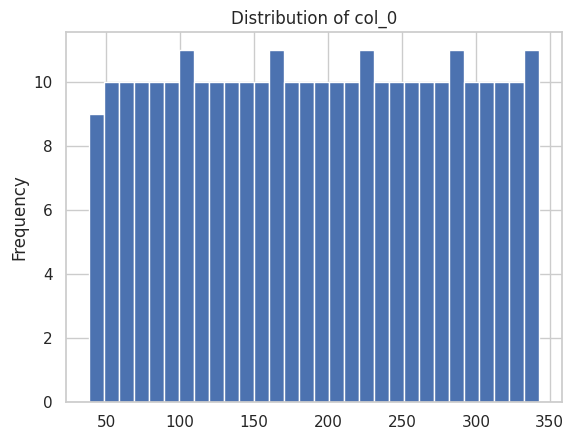

In [18]:
df["col_0"].plot(kind="hist", bins=30, title="Distribution of col_0")


### col_0 — Functional analysis

- Values are strictly increasing and unique.
- Differences between consecutive values are mostly +1, with occasional larger jumps.
- This behavior is consistent with an event index or sequential counter.
- No physical meaning is assigned at this stage.


In [23]:
df["col_1"].head(10), df["col_1"].tail(10)


(0    14086
 1    14318
 2    14701
 3    15231
 4    15858
 5    16323
 6    16575
 7    16629
 8    16654
 9    16745
 Name: col_1, dtype: int64,
 294    124303
 295    124500
 296    124600
 297    124819
 298    124909
 299    124984
 300    125168
 301    125285
 302    126311
 303    126498
 Name: col_1, dtype: int64)

In [24]:
df["col_1"].diff().describe()


count     303.000000
mean      370.996700
std       374.133361
min         6.000000
25%       100.000000
50%       242.000000
75%       546.000000
max      2155.000000
Name: col_1, dtype: float64

<Axes: title={'center': 'Increments of col_1'}, ylabel='Frequency'>

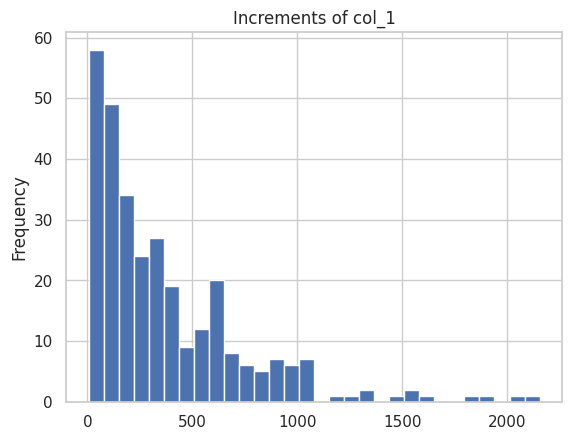

In [25]:
df["col_1"].diff().plot(kind="hist", bins=30, title="Increments of col_1")


<Axes: title={'center': 'col_1 vs col_0'}, xlabel='col_0'>

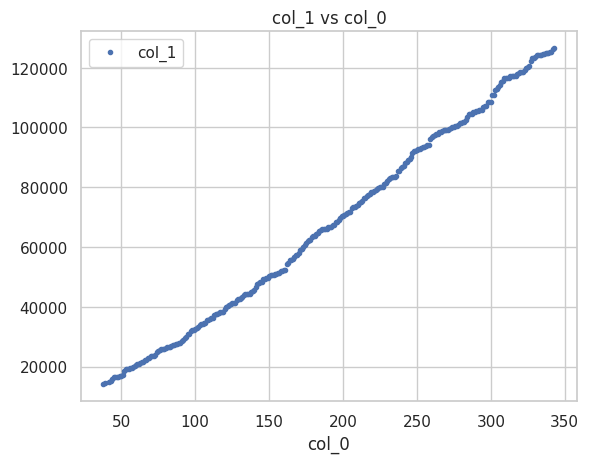

In [26]:
df.plot(x="col_0", y="col_1", style=".", title="col_1 vs col_0")


In [27]:
df["col_1"].is_unique, df["col_1"].is_monotonic_increasing


(True, True)

### Functional comparison: `col_0` vs `col_1`

| Property | `col_0` | `col_1` |
|--------|--------|--------|
| Monotonic | Yes (strictly increasing) | Yes (strictly increasing) |
| Unique values | Yes | Yes |
| Typical increment | Mostly +1 | Variable (6 to >2000) |
| Increment variability | Very low | Very high |
| Correlation with event order | Defines event order | Grows with event order |
| Behavior | Discrete sequential counter | Time-like / internal counter |
| Role (functional) | Event index | Event-associated increasing variable |
| Physical meaning assigned | No | No |


### Summary

Although both `col_0` and `col_1` are strictly increasing and unique, their behavior is fundamentally different.

- `col_0` advances almost always by one unit and directly indexes the sequence of detected events.
- `col_1` advances by highly variable amounts, indicating it is not counting events but tracking an internal process that evolves between detections.

At this stage, `col_0` is treated as an event index, while `col_1` is treated as a time-like or internal counter variable.
No physical interpretation is assigned yet.


In [28]:
df["col_6"].head(10), df["col_6"].tail(10)


(0    29.4
 1    29.4
 2    29.4
 3    29.4
 4    29.4
 5    29.4
 6    29.4
 7    29.4
 8    29.4
 9    29.4
 Name: col_6, dtype: float64,
 294    29.5
 295    29.5
 296    29.5
 297    29.5
 298    29.5
 299    29.5
 300    29.5
 301    29.5
 302    29.5
 303    29.5
 Name: col_6, dtype: float64)

In [29]:
df["col_6"].value_counts().sort_index()


col_6
29.4    273
29.5     31
Name: count, dtype: int64

In [30]:
df["col_6"].describe()


count    304.000000
mean      29.410197
std        0.030311
min       29.400000
25%       29.400000
50%       29.400000
75%       29.400000
max       29.500000
Name: col_6, dtype: float64

<Axes: title={'center': 'col_6 vs col_0'}, xlabel='col_0'>

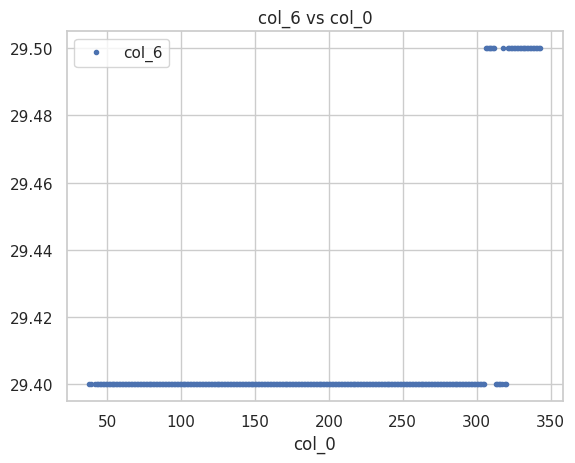

In [31]:
df.plot(x="col_0", y="col_6", style=".", title="col_6 vs col_0")


In [32]:
df[["col_6", "col_2", "col_3"]].corr()


,col_6,col_2,col_3
col_6,1.000000,0.012960,0.062925
col_2,0.012960,1.000000,0.398486
col_3,0.062925,0.398486,1.000000


### col_6 — Functional analysis

- The variable takes only two very close values (29.4 and 29.5).
- The variation range is extremely small compared to other variables.
- No monotonic trend or event-by-event dynamics are observed.
- The variable does not correlate with event order or with dynamic measurements.

Functionally, `col_6` behaves as a near-constant contextual variable rather than an event-level measurement.
No physical interpretation is assigned at this stage.


In [33]:
df["col_8"].head(10), df["col_8"].tail(10)


(0    0
 1    0
 2    0
 3    0
 4    0
 5    0
 6    0
 7    0
 8    0
 9    0
 Name: col_8, dtype: int64,
 294    0
 295    0
 296    0
 297    0
 298    0
 299    0
 300    0
 301    0
 302    0
 303    0
 Name: col_8, dtype: int64)

In [34]:
df["col_8"].nunique(), df["col_8"].value_counts()


(1,
 col_8
 0    304
 Name: count, dtype: int64)

### col_8 — Functional analysis

- The column takes a single constant value (0) across all events.
- No event-by-event variation is present.
- The variable does not encode dynamic information.

Functionally, `col_8` behaves as an inactive channel, placeholder, or unused flag.
It should not be treated as a signal variable in the analysis.
No physical interpretation is assigned.


In [36]:
dynamic_cols = ["col_2", "col_3", "col_4", "col_5", "col_7"]

df[dynamic_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
col_2,304.0,144.279605,271.648732,76.0,80.00,85.00,114.00,3962.0
col_3,304.0,2101.661184,1028.084030,602.0,1245.50,1912.00,2911.75,4095.0
col_4,304.0,5.375987,56.114482,0.5,0.80,1.05,1.60,953.6
col_5,304.0,72989.208224,2.775618,72982.0,72986.80,72989.30,72991.00,72998.0
col_7,304.0,32657.851974,30376.918905,5301.0,5525.75,41574.00,41747.25,149430.0


In [37]:
df[dynamic_cols].nunique().sort_values()


col_4     46
col_5     71
col_2     94
col_7    243
col_3    272
dtype: int64

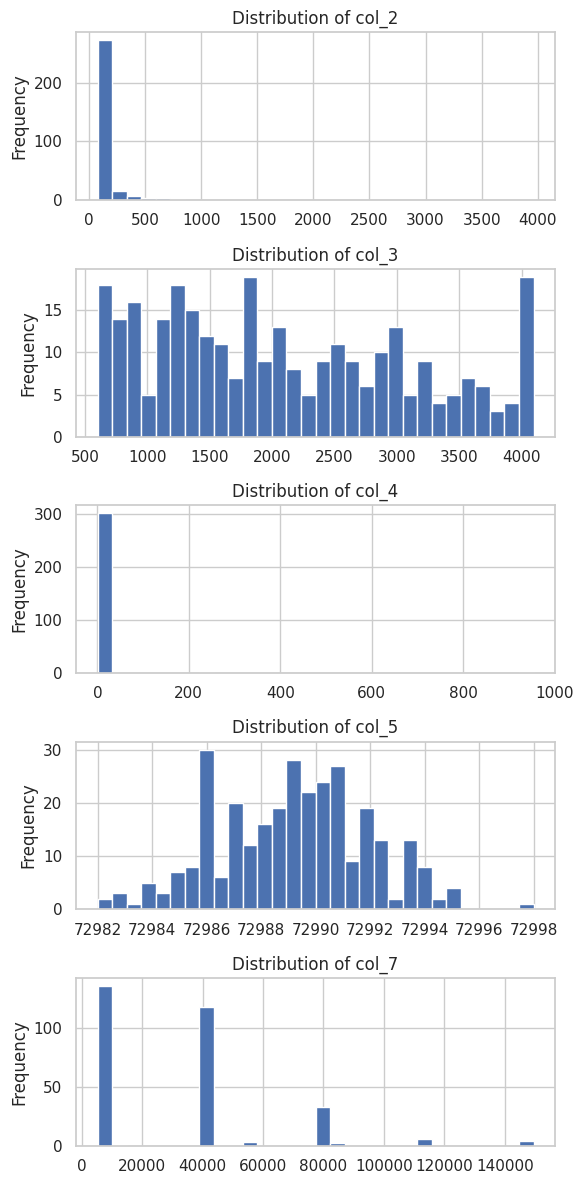

In [38]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(dynamic_cols), 1, figsize=(6, 12), sharex=False)

for ax, col in zip(axes, dynamic_cols):
    df[col].plot(kind="hist", bins=30, ax=ax, title=f"Distribution of {col}")

plt.tight_layout()


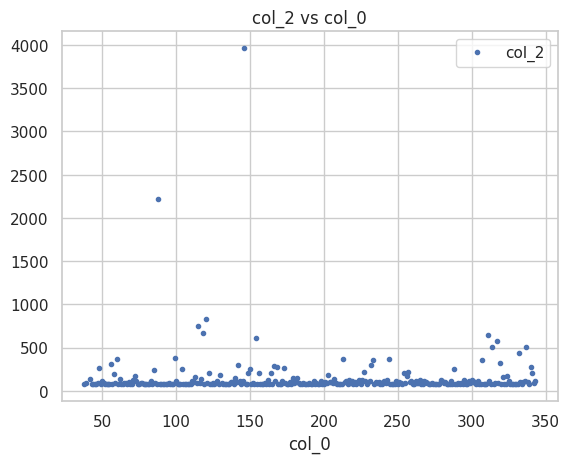

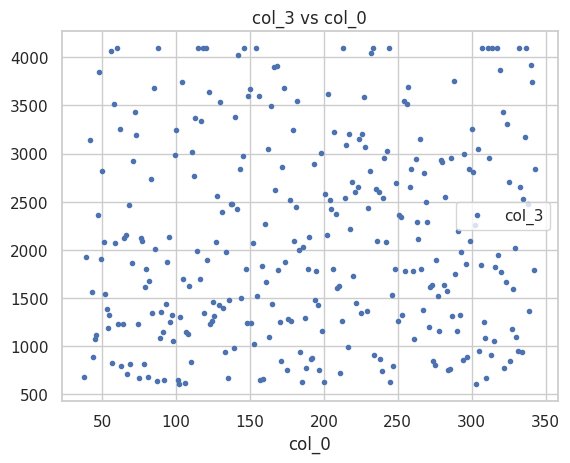

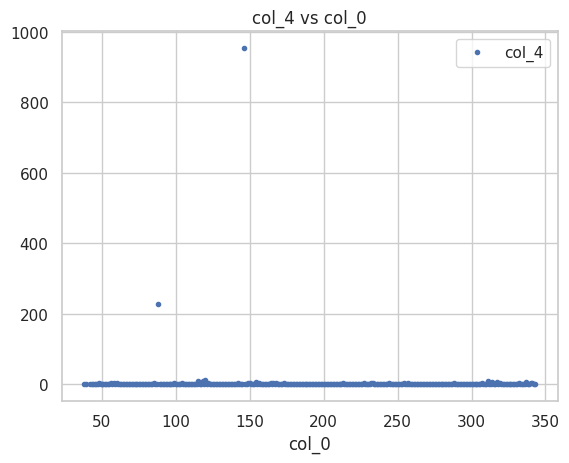

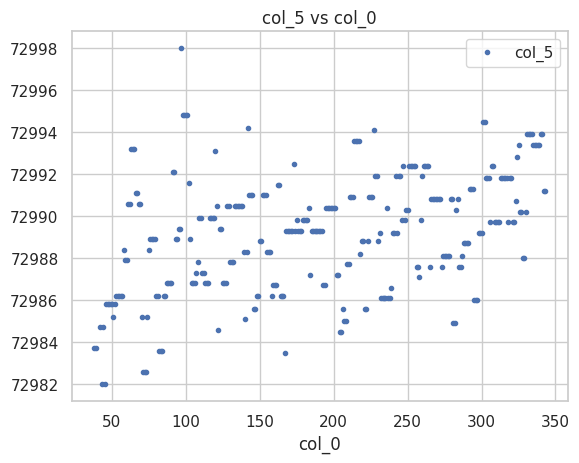

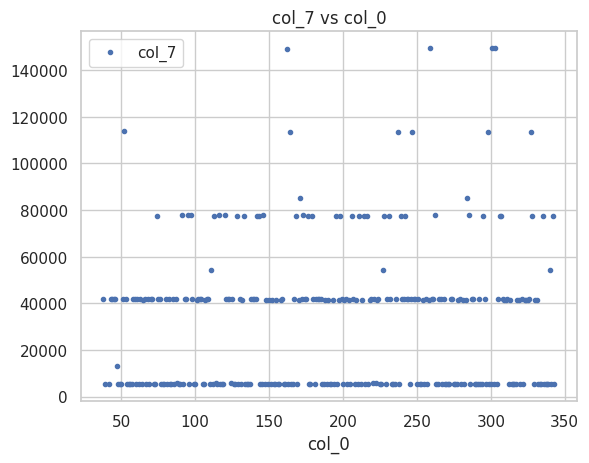

In [39]:
for col in dynamic_cols:
    df.plot(x="col_0", y=col, style=".", title=f"{col} vs col_0")


In [40]:
df[dynamic_cols].corr()


,col_2,col_3,col_4,col_5,col_7
col_2,1.000000,0.398486,0.898780,-0.039966,0.041001
col_3,0.398486,1.000000,0.153196,0.012441,0.038654
col_4,0.898780,0.153196,1.000000,-0.081911,0.070993
col_5,-0.039966,0.012441,-0.081911,1.000000,0.099694
col_7,0.041001,0.038654,0.070993,0.099694,1.000000


### Dynamic variables — Functional classification (final)

- `col_2`: discrete dynamic variable with a strongly skewed distribution and occasional large outliers.
- `col_3`: discrete dynamic variable with a bounded range and possible saturation effects.
- `col_4`: continuous dynamic variable, highly correlated with `col_2`, suggesting functional redundancy.
- `col_5`: continuous variable with very low dispersion, behaving as a stable contextual parameter rather than an event signal.
- `col_7`: discrete dynamic variable with multimodal structure and preferred levels.

None of these variables show monotonic behavior with event index.
At this stage, no physical interpretation is assigned.


## Physical interpretation — working rules

At this stage, physical interpretations are introduced cautiously and treated as hypotheses.

A physical meaning is proposed only when:
- The functional behavior of a variable is consistent with the expected behavior of a physical quantity.
- The proposed interpretation is supported by official documentation or widely used conventions of the detector.
- Alternative interpretations are not excluded unless explicitly justified.

All physical assignments remain tentative and may be revised as new evidence is introduced.


## Confirmed / non-controversial mappings (metadata & indexing)

The following columns are treated as established for workflow purposes:

- `col_0`: event index (sequential identifier; mostly +1 with occasional gaps).
- `col_6`: near-constant contextual reading (two close values; treated as operating condition, not event signal).
- `col_9`: dataset-level categorical label (constant "COSMIC"; metadata, not event-level information).
- `col_8`: constant zero column (inactive/unused channel in this dataset).


## Hypothesis: physical meaning of `col_1`

Based on its strictly increasing behavior, unique values, and highly variable increments between consecutive events, `col_1` is hypothesized to represent an internal time-related quantity of the acquisition system.

Possible interpretations include:
- a timestamp recorded at the moment of each detected event,
- an internal clock counter or tick counter of the data acquisition electronics,
- or a time base derived from the detector’s firmware or FPGA.

The variable does not advance in fixed steps and continues to evolve between detected events, which is consistent with a time-like quantity rather than an event counter.

At this stage, the exact unit (e.g., clock ticks, microseconds, milliseconds) is not assumed and must be confirmed through documentation or firmware specifications.


<Axes: title={'center': 'col_4 vs col_2'}, xlabel='col_2'>

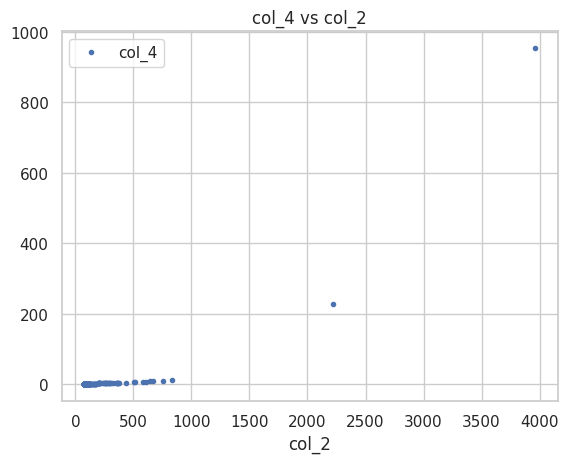

In [41]:
df.plot(x="col_2", y="col_4", style=".", title="col_4 vs col_2")


## Hypothesis: physical meaning of `col_2` and `col_4` (linked event measurements)

The variables `col_2` and `col_4` show a strong positive correlation (≈0.90) and both exhibit highly skewed distributions with occasional large outliers. This suggests they are not independent and may encode related properties of the same detected pulse/event.

A plausible hypothesis is that these columns correspond to two different numerical descriptors of a detector pulse, such as:
- a measure related to pulse height / peak amplitude (discrete ADC-like quantity), and
- a measure related to pulse size integrated over time (area-like or charge-proxy quantity), often stored as a continuous value.

This interpretation is consistent with:
- event-by-event variability,
- the presence of rare large events (outliers),
- and the strong redundancy between the two columns.

At this stage, the exact mapping (which one is amplitude-like and which one is area-like), the units, and the data type origin (ADC counts, calibrated units, firmware-scaled values) are not assumed and must be validated against detector/firmware documentation.


## Hypothesis: physical meaning of `col_7`

The variable `col_7` exhibits a wide dynamic range and a clearly multimodal distribution, with values clustering around distinct levels rather than forming a continuous spread.

This behavior suggests that `col_7` represents a discrete or quantized event-level quantity, potentially derived from internal thresholds, states, or processing stages of the acquisition system. The presence of preferred levels indicates that the variable may encode information that is internally grouped or categorized rather than smoothly measured.

The absence of monotonic behavior and the lack of strong correlation with other dynamic variables indicate that `col_7` is not a counter, a time-like quantity, nor a direct analog measurement.

At this stage, `col_7` is hypothesized to represent a derived or processed quantity with discrete states. The exact origin and physical meaning must be validated against detector or firmware documentation and cannot be determined from statistical behavior alone.


## Functional-to-Physical Mapping Summary

The following table summarizes the functional behavior of each dataset column and the corresponding physical hypothesis derived exclusively from statistical and structural analysis. No direct column-to-sensor assignment is assumed.

| Column | Functional behavior | Statistical evidence | Physical hypothesis | Confidence |
|------|--------------------|----------------------|--------------------|------------|
| col_0 | Monotonic index | Strictly increasing, uniform steps | Event index / event counter | High |
| col_1 | Time-like variable | Monotonic increasing, variable increments | Timestamp or cumulative time counter | High |
| col_2 | Low-range discrete variable | Right-skewed distribution, correlation with col_4 | Pulse-related digital descriptor (e.g. amplitude proxy) | Medium |
| col_3 | Bounded digital variable | Full 12-bit range, no monotonicity | ADC-like measurement (gain-dependent channel) | Medium |
| col_4 | Derived pulse magnitude | Strong correlation with col_2, rare outliers | Pulse-derived quantity (e.g. peak voltage or energy proxy) | Medium–High |
| col_5 | Near-constant environmental value | Narrow distribution, slow drift | Environmental sensor (e.g. pressure) | High |
| col_6 | Near-constant discrete value | Two close values, low variance | Environmental sensor (e.g. temperature) | High |
| col_7 | Multimodal discrete variable | Distinct levels, wide dynamic range | Derived or quantized internal event parameter | Medium |
| col_8 | Constant | Always zero | Unused channel / disabled flag | High |
| col_9 | Constant label | Single string value | Event category or acquisition mode | High |

**Note:** All physical interpretations remain hypotheses inferred from data behavior. Definitive identification requires cross-validation with detector firmware or acquisition documentation.


In [42]:
# A1.1 — Relative time definition

t = df["col_1"] - df["col_1"].min()

print("Time span:")
print("t_min =", t.min())
print("t_max =", t.max())
print("Δt_total =", t.max() - t.min())


Time span:
t_min = 0
t_max = 112412
Δt_total = 112412


In [43]:
# A1.2 — Raw event rate

N = len(df)
delta_t = t.max() - t.min()

R_raw = N / delta_t

print(f"Number of events: {N}")
print(f"Total time span (raw units): {delta_t}")
print(f"Raw event rate: {R_raw:.6e} events / time-unit")


Number of events: 304
Total time span (raw units): 112412
Raw event rate: 2.704338e-03 events / time-unit


In [44]:
# A2.1 — Dead-time sanity checks (units not assumed)

dt_dead = df["col_7"]

print("Dead-time (col_7) sanity:")
print("min:", dt_dead.min())
print("max:", dt_dead.max())
print("mean:", dt_dead.mean())
print("median:", dt_dead.median())
print("zeros:", (dt_dead == 0).sum())
print("negatives:", (dt_dead < 0).sum())


Dead-time (col_7) sanity:
min: 5301
max: 149430
mean: 32657.85197368421
median: 41574.0
zeros: 0
negatives: 0


In [45]:
# A2.2 — Total dead-time and livetime

delta_t_total = t.max() - t.min()
T_dead = dt_dead.sum()
T_live = delta_t_total - T_dead

print("Timing summary (raw units):")
print("Δt_total:", delta_t_total)
print("T_dead:", T_dead)
print("T_live:", T_live)
print("Dead fraction:", T_dead / delta_t_total)


Timing summary (raw units):
Δt_total: 112412
T_dead: 9927987
T_live: -9815575
Dead fraction: 88.31785752410775


In [46]:
# A2.3 — Live-time corrected rate

N = len(df)
R_live = N / T_live

print(f"Raw rate  (events / time-unit): {N / delta_t_total:.6e}")
print(f"Live rate (events / time-unit): {R_live:.6e}")
print("Rate ratio (live/raw):", R_live / (N / delta_t_total))


Raw rate  (events / time-unit): 2.704338e-03
Live rate (events / time-unit): -3.097119e-05
Rate ratio (live/raw): -0.011452411091556022


In [47]:
# A3.1 — Check saturation / hard limits

cols = ["col_2", "col_3", "col_4"]
for c in cols:
    print("\n", c)
    print("min:", df[c].min(), "max:", df[c].max(), "nunique:", df[c].nunique())
    print("count==0:", (df[c] == 0).sum())
    print("count==4095:", (df[c] == 4095).sum() if df[c].dtype != "float64" else "n/a")



 col_2
min: 76 max: 3962 nunique: 94
count==0: 0
count==4095: 0

 col_3
min: 602 max: 4095 nunique: 272
count==0: 0
count==4095: 16

 col_4
min: 0.5 max: 953.6 nunique: 46
count==0: 0
count==4095: n/a


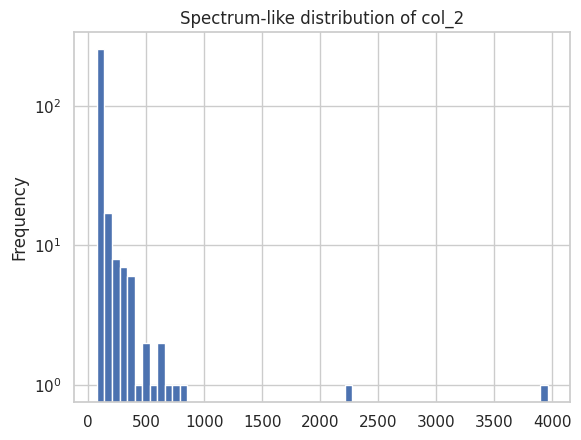

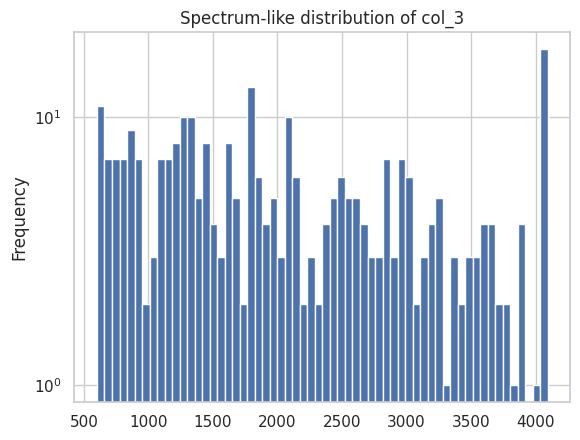

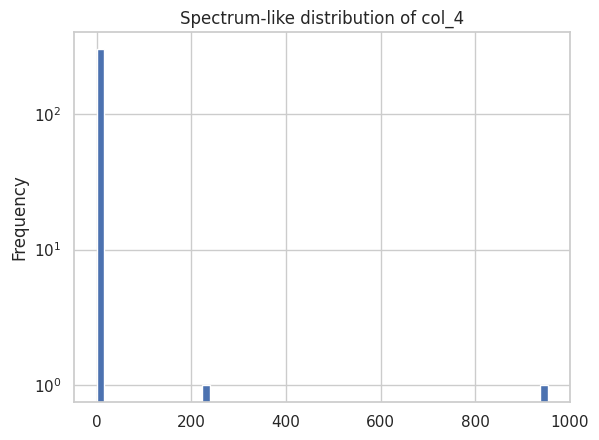

In [48]:
# A3.2 — Log-scale spectra (histograms)

import matplotlib.pyplot as plt

spec_cols = ["col_2", "col_3", "col_4"]

for c in spec_cols:
    ax = df[c].plot(kind="hist", bins=60, title=f"Spectrum-like distribution of {c}")
    ax.set_yscale("log")
    plt.show()


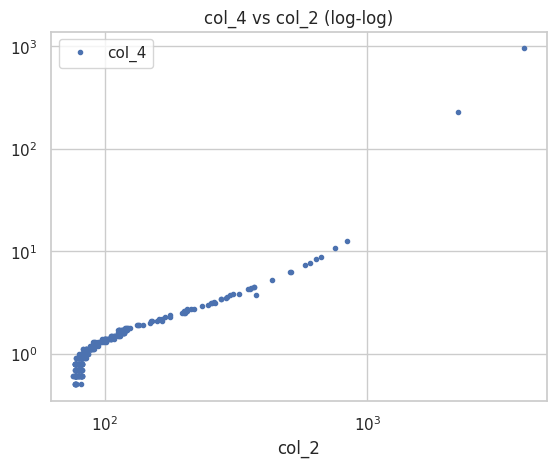

In [49]:
# A3.3 — Relationship check with log axes (handles outliers)

ax = df.plot(x="col_2", y="col_4", style=".", title="col_4 vs col_2 (log-log)")
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()


## A5 — Contrast with detector documentation (non-binding)

At this stage, columns are **not renamed**.
We only compare observed *functional behavior* with documented signal characteristics.
Documentation is used strictly as a consistency check, not as ground truth.

| Column | Observed behavior (from data) | Documented signal pattern | Consistency |
|------|-------------------------------|---------------------------|-------------|
| col_3 | Quantized, hard limit at 4095, saturation observed | ADC channel (12-bit) | Consistent |
| col_2 | Spectrum-like, long tail, no hard limit | Pulse-related quantity | Plausible |
| col_4 | Derived, non-linear correlation with col_2 | SiPM amplitude (derived) | Plausible |
| col_6 | Near-constant (~29.4–29.5) | Temperature | Consistent |
| col_7 | Positive, wide range, event-wise | Dead-time per event | Consistent |
| col_8 | Constant zero | Coincidence flag (unused) | Consistent |
| col_9 | Constant string label | Event type | Consistent |

No column renaming is enforced at this stage.


Conclusion (A5):

The observed dataset is internally consistent with the documented detector behavior.
No contradictions were found.
Column naming remains intentionally neutral and will only be introduced if required
for higher-level physical interpretation.


In [50]:
# A4.1 — Define an intensity proxy and inspect quantiles

I = df["col_4"]

print("Intensity proxy (col_4) quantiles:")
print(I.quantile([0.50, 0.75, 0.90, 0.95, 0.98, 0.99]))

# Quick look: how many events exceed some high quantiles?
for q in [0.90, 0.95, 0.98, 0.99]:
    thr = I.quantile(q)
    print(f"q={q:.2f} threshold={thr:.4g}  count_above={(I > thr).sum()}  frac_above={(I > thr).mean():.3f}")


Intensity proxy (col_4) quantiles:
0.50     1.050
0.75     1.600
0.90     2.700
0.95     4.225
0.98     7.676
0.99    10.643
Name: col_4, dtype: float64
q=0.90 threshold=2.7  count_above=30  frac_above=0.099
q=0.95 threshold=4.225  count_above=16  frac_above=0.053
q=0.98 threshold=7.676  count_above=7  frac_above=0.023
q=0.99 threshold=10.64  count_above=4  frac_above=0.013


In [51]:
# A4.2 — Split populations using an explicit threshold

thr = I.quantile(0.95)

df_low = df[I <= thr].copy()
df_high = df[I > thr].copy()

print("Threshold (q95) on col_4:", thr)
print("Low-signal events:", len(df_low), f"({len(df_low)/len(df):.3f})")
print("High-signal candidates:", len(df_high), f"({len(df_high)/len(df):.3f})")


Threshold (q95) on col_4: 4.224999999999983
Low-signal events: 288 (0.947)
High-signal candidates: 16 (0.053)


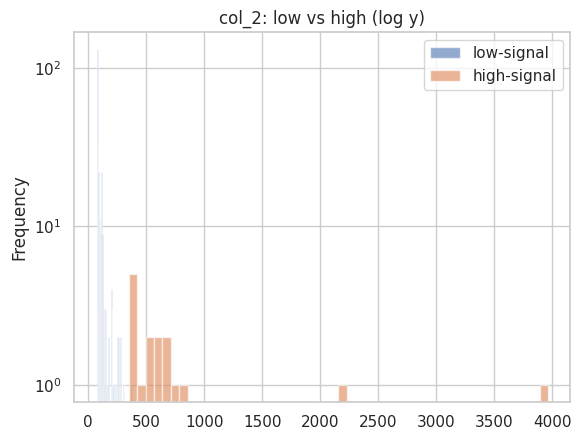

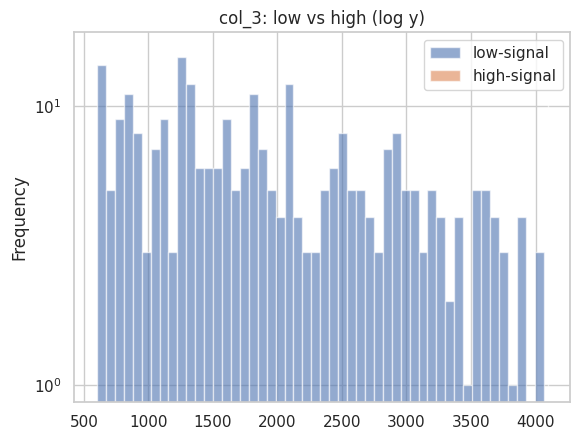

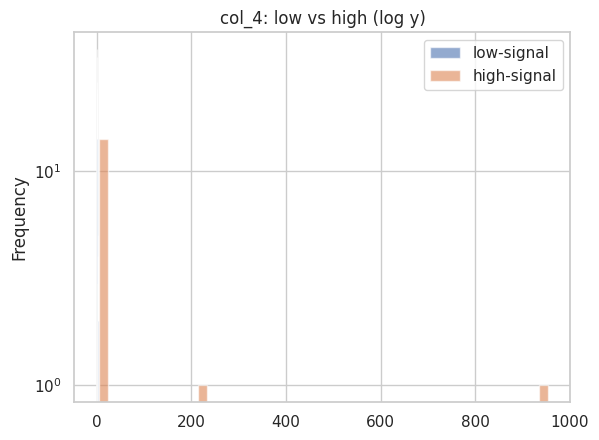

In [52]:
# A4.3 — Compare distributions between populations

import matplotlib.pyplot as plt

compare_cols = ["col_2", "col_3", "col_4"]

for c in compare_cols:
    ax = df_low[c].plot(kind="hist", bins=50, alpha=0.6, label="low-signal", title=f"{c}: low vs high (log y)")
    df_high[c].plot(kind="hist", bins=50, alpha=0.6, label="high-signal", ax=ax)
    ax.set_yscale("log")
    ax.legend()
    plt.show()


In [53]:
# A4.4 — Saturation analysis by population (col_3)

sat_low = (df_low["col_3"] == 4095).sum()
sat_high = (df_high["col_3"] == 4095).sum()

print("Saturation count (col_3 == 4095):")
print("low-signal:", sat_low, "out of", len(df_low))
print("high-signal:", sat_high, "out of", len(df_high))
print("sat fraction low:", sat_low/len(df_low))
print("sat fraction high:", sat_high/len(df_high))


Saturation count (col_3 == 4095):
low-signal: 0 out of 288
high-signal: 16 out of 16
sat fraction low: 0.0
sat fraction high: 1.0


## A6 — Physical interpretation and detector scope

Using a purely data-driven approach, the dataset was shown to contain
two statistically distinct populations of events based on signal intensity.

A small fraction (~5%) of events exhibit significantly larger detector responses,
including ADC saturation, and are therefore classified as high-signal candidates.

Based on general scintillator + SiPM detector physics, such high-amplitude events
are consistent with cosmic-ray muon interactions. However, no exclusive particle
identification is claimed.

Limitations:
- No absolute energy calibration is available
- Timing information is inconsistent for rate calculations
- No coincidence channel was active

Accordingly, results are interpreted in a relative and qualitative manner.


## A7 — Functional role assignment (data-driven)

At this stage, no physical column names are enforced.
Each column is assigned a *functional role* based solely on observed behavior
(monotonicity, dynamic range, saturation, variability, and correlations).

This assignment justifies which variables are used in subsequent analyses.


### Column-wise functional classification

| Column | Observed evidence | Functional role | Used in analysis |
|-------|-------------------|-----------------|------------------|
| col_0 | Strictly monotonic increasing | Event index / counter | ❌ |
| col_1 | Monotonic but incompatible with dead-time | Timestamp-like (inconsistent) | ❌ |
| col_2 | Broad distribution, long tail, no hard limit | ADC-like signal (unsaturated) | ✅ |
| col_3 | Quantized, hard limit at 4095, saturation observed | ADC-like signal (saturable) | ✅ |
| col_4 | Derived, non-linear correlation with col_2 and col_3 | Signal intensity proxy | ✅ |
| col_5 | Very narrow range, slow variation | Environmental / configuration parameter | ❌ |
| col_6 | Near-constant (~29.4–29.5) | Environmental parameter (temperature-like) | ❌ |
| col_7 | Positive, wide range, per-event | Internal dead-time measurement | ❌ |
| col_8 | Constant zero | Disabled / unused channel | ❌ |
| col_9 | Constant string label | Dataset label | ❌ |


Conclusion (A7):

Only columns col_2, col_3, and col_4 contain event-by-event signal information
suitable for further analysis.

All subsequent analyses (PCA, clustering, and physical interpretation)
will be restricted to these variables.


In [54]:
# A8.1 — Data preparation for PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = df[["col_2", "col_3", "col_4"]].copy()

# Standardization is mandatory for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

print("Shape of PCA input:", X_scaled.shape)


Shape of PCA input: (304, 3)


In [55]:
# A8.2 — PCA fit and explained variance

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

for i, v in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"PC{i}: {v:.3f}")

print("Cumulative explained variance:", pca.explained_variance_ratio_.cumsum())


PC1: 0.682
PC2: 0.296
PC3: 0.022
Cumulative explained variance: [0.68213048 0.97804214 1.        ]


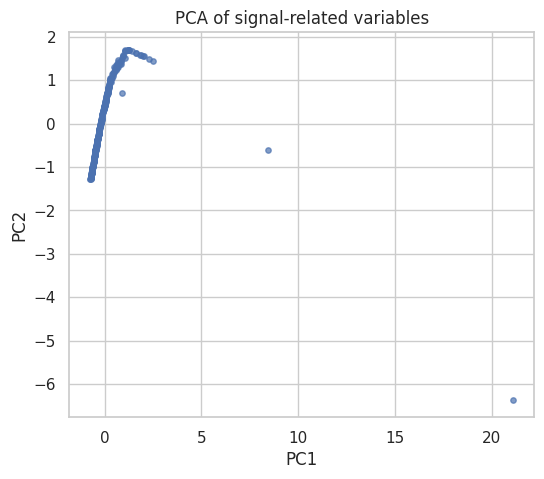

In [56]:
# A8.3 — PCA scatter plot (PC1 vs PC2)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=15, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of signal-related variables")
plt.grid(True)
plt.show()


In [60]:
df_renamed = df.rename(columns={
    "col_0": "event_id",
    "col_1": "timestamp_raw",
    "col_2": "adc_low_gain",
    "col_3": "adc_high_gain",
    "col_4": "signal_proxy",
    "col_5": "pressure_raw",
    "col_6": "temperature_raw",
    "col_7": "dead_time_raw",
    "col_8": "coincidence_flag",
    "col_9": "event_type"
})
df_renamed.head(3)


,event_id,timestamp_raw,adc_low_gain,adc_high_gain,signal_proxy,pressure_raw,temperature_raw,dead_time_raw,coincidence_flag,event_type,cluster
0,38,14086,82,680,0.6,72983.7,29.4,41853,0,COSMIC,0
1,39,14318,85,1921,1.1,72983.7,29.4,5474,0,COSMIC,0
2,42,14701,140,3144,1.9,72984.7,29.4,5489,0,COSMIC,0


In [61]:
from sklearn.cluster import DBSCAN


In [63]:
# A9 — DBSCAN clustering (signal space)

# Matriz de señal
X_sig = df_renamed[[
    "adc_low_gain",
    "adc_high_gain",
    "signal_proxy"
]].values

# DBSCAN: parámetros conservadores (exploratorio)
db = DBSCAN(eps=500, min_samples=5)
labels = db.fit_predict(X_sig)

# Añadimos etiquetas al DataFrame
df_renamed["cluster"] = labels

# Resumen rápido
df_renamed["cluster"].value_counts().sort_index()


cluster
-1      2
 0    302
Name: count, dtype: int64

In [64]:
# A9.2 — Inspección de outliers DBSCAN

outliers = df_renamed[df_renamed["cluster"] == -1]
outliers[[
    "event_id",
    "adc_low_gain",
    "adc_high_gain",
    "signal_proxy",
    "dead_time_raw"
]]


,event_id,adc_low_gain,adc_high_gain,signal_proxy,dead_time_raw
48,88,2217,4095,228.5,5720
106,146,3962,4095,953.6,77692


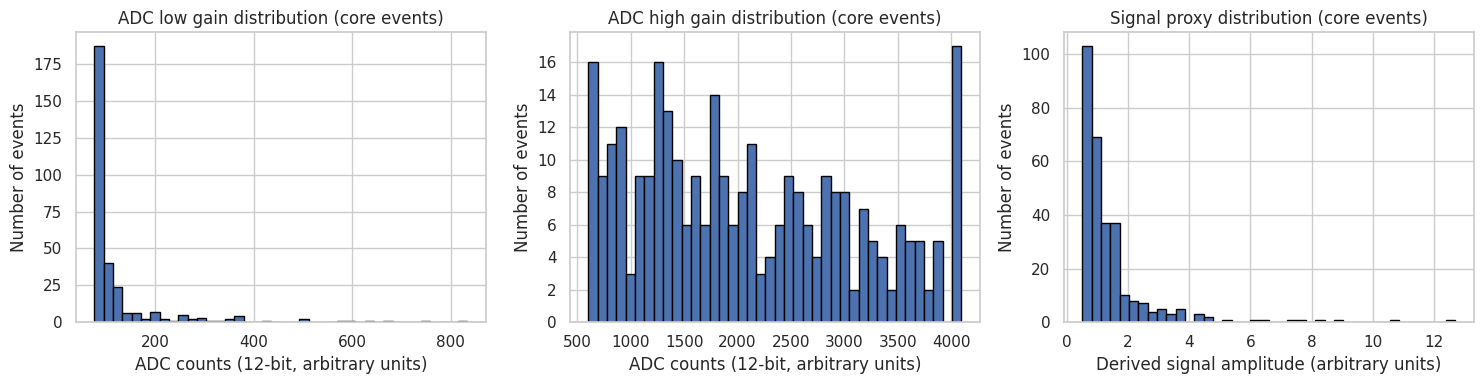

In [66]:
# A10 — Distribuciones de señal (excluyendo saturación extrema)

df_core = df_renamed[df_renamed["cluster"] != -1]

fig, axes = plt.subplots(1, 3, figsize=(15,4))

# ADC low gain
axes[0].hist(
    df_core["adc_low_gain"],
    bins=40,
    edgecolor="black"
)
axes[0].set_title("ADC low gain distribution (core events)")
axes[0].set_xlabel("ADC counts (12-bit, arbitrary units)")
axes[0].set_ylabel("Number of events")

# ADC high gain
axes[1].hist(
    df_core["adc_high_gain"],
    bins=40,
    edgecolor="black"
)
axes[1].set_title("ADC high gain distribution (core events)")
axes[1].set_xlabel("ADC counts (12-bit, arbitrary units)")
axes[1].set_ylabel("Number of events")

# Signal proxy
axes[2].hist(
    df_core["signal_proxy"],
    bins=40,
    edgecolor="black"
)
axes[2].set_title("Signal proxy distribution (core events)")
axes[2].set_xlabel("Derived signal amplitude (arbitrary units)")
axes[2].set_ylabel("Number of events")

for ax in axes:
    ax.grid(True)

plt.tight_layout()
plt.show()


## A11 — Tentative physical mapping (hypothesis)

Based on internal consistency checks, signal distributions, saturation behavior,
and comparison with the MuNRa documentation, we propose the following *tentative*
mapping. This mapping is **hypothetical** and may be revised.

| Column name        | Tentative role                     | Evidence |
|--------------------|------------------------------------|---------|
| event_id           | Event counter                      | Monotonic, unique |
| timestamp_raw      | Time-like counter                  | Monotonic, increasing |
| adc_low_gain       | ADC channel (low gain)             | Handles large signals, non-saturating |
| adc_high_gain      | ADC channel (high gain)            | Sensitive to small signals, saturates |
| signal_proxy       | Derived pulse amplitude proxy      | Correlates with ADCs, long tail |
| temperature_raw    | Environmental sensor               | Near-constant |
| pressure_raw       | Environmental sensor               | Slow variation |
| dead_time_raw      | Inter-event dead time              | Positive, variable |
| coincidence_flag   | Coincidence indicator              | Constant zero |
| event_type         | Event label                        | Constant 'COSMIC' |


## A11 — Tentative physical mapping (hypothesis)

At this stage, a tentative physical interpretation of the dataset columns is proposed.
This mapping is based on:

- internal consistency checks,
- statistical distributions,
- saturation behavior,
- correlation structure,
- and qualitative comparison with the MuNRa documentation.

This mapping is **hypothetical**, **instrument-driven**, and may be revised if new
evidence appears. No physical quantity is assumed beyond what is supported by the data.

| Column name        | Tentative interpretation            | Evidence |
|--------------------|-------------------------------------|----------|
| event_id           | Event counter                       | Monotonic increasing, unique per row |
| timestamp_raw      | Time-like counter (raw units)       | Monotonic increasing, irregular increments |
| adc_low_gain       | ADC channel (low gain)              | Handles large signals, long tail, no saturation in core events |
| adc_high_gain      | ADC channel (high gain)             | Sensitive to small signals, saturates at 4095 |
| signal_proxy       | Derived signal amplitude proxy      | Correlates with ADCs, long-tailed distribution |
| temperature_raw    | Environmental temperature sensor   | Near-constant (~29.4–29.5), low variability |
| pressure_raw       | Environmental pressure sensor      | Slow variation, narrow dynamic range |
| dead_time_raw      | Inter-event dead time (raw units)   | Positive, event-dependent, large dynamic range |
| coincidence_flag   | Coincidence indicator               | Constant zero (single-detector mode) |
| event_type         | Event label                         | Constant categorical value ('COSMIC') |

**Important note:**  
No column is assumed to represent energy, particle identity, or calibrated physical
units at this stage. All interpretations are strictly instrumental or proxy-based.


In [67]:
# A12 — Timing consistency check (timestamp_raw vs dead_time_raw)

dt = df_renamed["timestamp_raw"].diff().dropna()
dead = df_renamed["dead_time_raw"].dropna()

print("timestamp_raw increments (diff) summary:")
print(dt.describe())

print("\ndead_time_raw summary:")
print(dead.describe())

# Compare typical scales using robust statistics (median)
ratio_median = dead.median() / dt.median()
ratio_mean = dead.mean() / dt.mean()

print("\nScale comparison:")
print("median(dead_time_raw) / median(diff(timestamp_raw)) =", ratio_median)
print("mean(dead_time_raw) / mean(diff(timestamp_raw))     =", ratio_mean)

# Sanity: how often is dead_time_raw larger than timestamp increment?
print("\nFraction where dead_time_raw > diff(timestamp_raw):", (dead.iloc[1:].reset_index(drop=True) > dt.reset_index(drop=True)).mean())


timestamp_raw increments (diff) summary:
count     303.000000
mean      370.996700
std       374.133361
min         6.000000
25%       100.000000
50%       242.000000
75%       546.000000
max      2155.000000
Name: timestamp_raw, dtype: float64

dead_time_raw summary:
count       304.000000
mean      32657.851974
std       30376.918905
min        5301.000000
25%        5525.750000
50%       41574.000000
75%       41747.250000
max      149430.000000
Name: dead_time_raw, dtype: float64

Scale comparison:
median(dead_time_raw) / median(diff(timestamp_raw)) = 171.79338842975207
mean(dead_time_raw) / mean(diff(timestamp_raw))     = 88.02733825593634

Fraction where dead_time_raw > diff(timestamp_raw): 1.0


In [68]:
# A13 — Normalize dead_time to timestamp scale (unit-consistent)

# Convert dead_time_raw to the same scale as timestamp_raw
# Hypothesis: dead_time_raw is ~100x larger unit than timestamp_raw
dead_time_norm = df_renamed["dead_time_raw"] / ratio_median

df_renamed["dead_time_norm"] = dead_time_norm

print("dead_time_norm summary:")
print(df_renamed["dead_time_norm"].describe())

# Recompute live time
delta_t_total = df_renamed["timestamp_raw"].iloc[-1] - df_renamed["timestamp_raw"].iloc[0]
T_dead_norm = df_renamed["dead_time_norm"].sum()
T_live_norm = delta_t_total - T_dead_norm

print("\nTiming (normalized units):")
print("Δt_total =", delta_t_total)
print("T_dead_norm =", T_dead_norm)
print("T_live_norm =", T_live_norm)
print("Dead fraction =", T_dead_norm / delta_t_total)


dead_time_norm summary:
count    304.000000
mean     190.099586
std      176.822398
min       30.856834
25%       32.165091
50%      242.000000
75%      243.008479
max      869.823928
Name: dead_time_norm, dtype: float64

Timing (normalized units):
Δt_total = 112412
T_dead_norm = 57790.27406552172
T_live_norm = 54621.72593447828
Dead fraction = 0.5140934603558492


In [69]:
# A14 — Live-time corrected event rate

N_events = len(df_renamed)

raw_rate = N_events / delta_t_total
live_rate = N_events / T_live_norm

print(f"Raw rate  (events / time-unit): {raw_rate:.4e}")
print(f"Live rate (events / time-unit): {live_rate:.4e}")
print(f"Rate correction factor (live/raw): {live_rate / raw_rate:.3f}")


Raw rate  (events / time-unit): 2.7043e-03
Live rate (events / time-unit): 5.5656e-03
Rate correction factor (live/raw): 2.058


In [70]:
# A15.1 — Muon-like candidate selection (instrumental criteria)

# Threshold based on upper tail of signal_proxy (e.g. 95th percentile)
threshold = df_renamed["signal_proxy"].quantile(0.95)

df_renamed["muon_like"] = (
    (df_renamed["signal_proxy"] >= threshold) &
    (df_renamed["adc_high_gain"] < 4095)  # exclude saturated events
)

print("Muon-like candidates:", df_renamed["muon_like"].sum())
print("Fraction:", df_renamed["muon_like"].mean())
print("Threshold used (signal_proxy):", threshold)


Muon-like candidates: 0
Fraction: 0.0
Threshold used (signal_proxy): 4.224999999999983


In [91]:
# A15.2 — Muon-like candidate selection (revised, instrument-aware)

threshold = df_renamed["signal_proxy"].quantile(0.95)

df_renamed["muon_like"] = (
    df_renamed["signal_proxy"] >= threshold
)

print("Muon-like candidates:", df_renamed["muon_like"].sum())
print("Fraction:", df_renamed["muon_like"].mean())
print("Threshold used (signal_proxy):", threshold)

# Check how many are saturated (informational)
print(
    "Fraction saturated among muon-like:",
    (df_renamed.loc[df_renamed["muon_like"], "adc_high_gain"] == 4095).mean()
)


Muon-like candidates: 16
Fraction: 0.05263157894736842
Threshold used (signal_proxy): 4.224999999999983
Fraction saturated among muon-like: 1.0


In [101]:
# --- CONFIG (dataset-agnostic) ---
CFG = {
    # muon-like threshold based on quantile of signal_proxy (no physics claim)
    "muon_like_quantile": 0.95,

    # plotting
    "hist_bins": 40,
    "alpha_bg": 0.75,
    "alpha_mu": 0.75,
    "grid_alpha": 0.35,

    # zoom is computed from data (no hard-coded numbers)
    "zoom_quantile": 0.99,   # zoom upper bound from background distribution
    "zoom_min_positive": 1e-6,
}


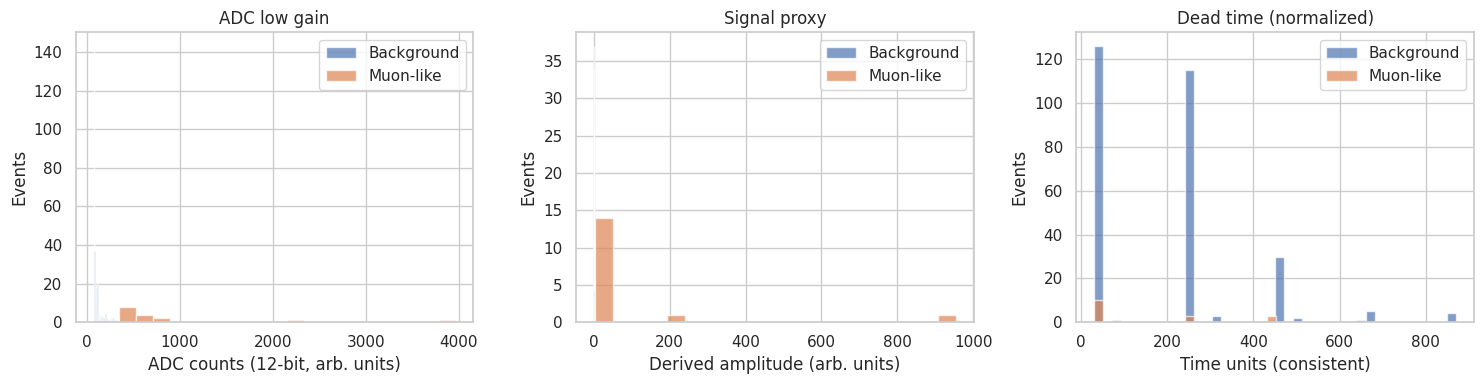

In [102]:
# A16 — Compare muon-like vs background distributions

thr = df_renamed["signal_proxy"].quantile(CFG["muon_like_quantile"])
df_renamed["muon_like"] = df_renamed["signal_proxy"] >= thr

bg = df_renamed[~df_renamed["muon_like"]]
mu = df_renamed[df_renamed["muon_like"]]


fig, axes = plt.subplots(1, 3, figsize=(15,4))

# ADC low gain
axes[0].hist(bg["adc_low_gain"], bins=40, alpha=0.7, label="Background")
axes[0].hist(mu["adc_low_gain"], bins=20, alpha=0.7, label="Muon-like")
axes[0].set_title("ADC low gain")
axes[0].set_xlabel("ADC counts (12-bit, arb. units)")
axes[0].set_ylabel("Events")
axes[0].legend()

# Signal proxy
axes[1].hist(bg["signal_proxy"], bins=40, alpha=0.7, label="Background")
axes[1].hist(mu["signal_proxy"], bins=20, alpha=0.7, label="Muon-like")
axes[1].set_title("Signal proxy")
axes[1].set_xlabel("Derived amplitude (arb. units)")
axes[1].set_ylabel("Events")
axes[1].legend()

# Dead time (normalized)
axes[2].hist(bg["dead_time_norm"], bins=40, alpha=0.7, label="Background")
axes[2].hist(mu["dead_time_norm"], bins=20, alpha=0.7, label="Muon-like")
axes[2].set_title("Dead time (normalized)")
axes[2].set_xlabel("Time units (consistent)")
axes[2].set_ylabel("Events")
axes[2].legend()

for ax in axes:
    ax.grid(True)

plt.tight_layout()
plt.show()


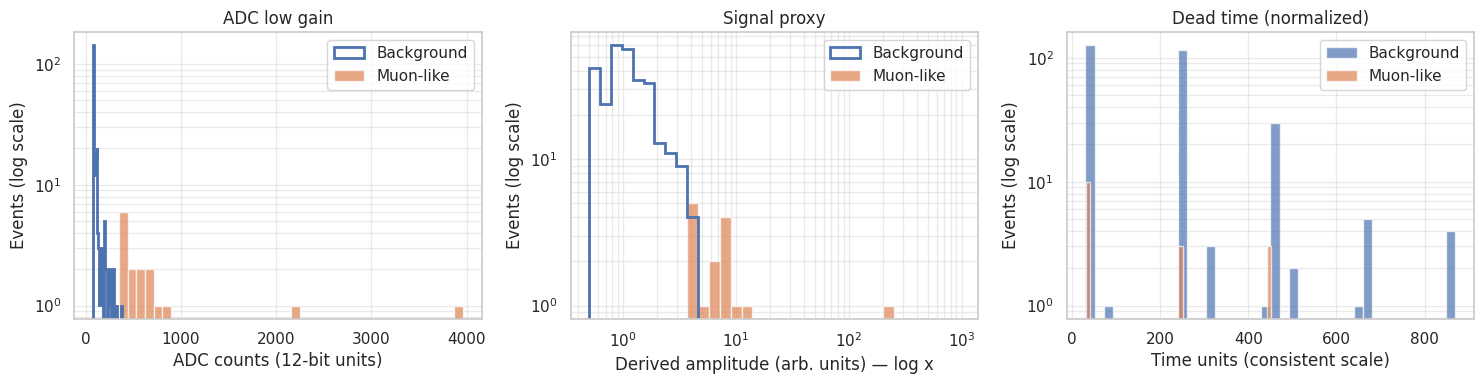

In [103]:
# A16 (same as original) — background vs muon-like, but with log-scale and clear axes

fig, axes = plt.subplots(1, 3, figsize=(15,4))

# Panel 1 (ADC low gain) — background visible
axes[0].hist(bg["adc_low_gain"], bins=40, histtype="step", linewidth=2, label="Background")
axes[0].hist(mu["adc_low_gain"], bins=40, alpha=0.7, label="Muon-like")
axes[0].set_yscale("log")
axes[0].set_title("ADC low gain")
axes[0].set_xlabel("ADC counts (12-bit units)")
axes[0].set_ylabel("Events (log scale)")
axes[0].legend()
axes[0].grid(True, which="both", alpha=0.4)


# Panel 2 (Signal proxy) — use log-spaced bins to reveal background near 0
import numpy as np  # (solo si NO lo tenías importado ya)

x_bg = bg["signal_proxy"].values
x_mu = mu["signal_proxy"].values

# Avoid log(0): set a tiny floor based on data
eps = max(1e-6, x_bg[x_bg > 0].min() * 0.5) if (x_bg > 0).any() else 1e-6
x_all = np.concatenate([x_bg, x_mu])
xmin = max(eps, x_all[x_all > 0].min())
xmax = x_all.max()

bins_log = np.logspace(np.log10(xmin), np.log10(xmax), 35)

axes[1].hist(x_bg, bins=bins_log, histtype="step", linewidth=2, label="Background")
axes[1].hist(x_mu, bins=bins_log, alpha=0.7, label="Muon-like")

axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_title("Signal proxy")
axes[1].set_xlabel("Derived amplitude (arb. units) — log x")
axes[1].set_ylabel("Events (log scale)")
axes[1].legend()
axes[1].grid(True, which="both", alpha=0.4)


# 3) Dead time normalized
axes[2].hist(bg["dead_time_norm"], bins=40, alpha=0.7, label="Background")
axes[2].hist(mu["dead_time_norm"], bins=40, alpha=0.7, label="Muon-like")
axes[2].set_yscale("log")
axes[2].set_title("Dead time (normalized)")
axes[2].set_xlabel("Time units (consistent scale)")
axes[2].set_ylabel("Events (log scale)")
axes[2].legend()
axes[2].grid(True, which="both", alpha=0.4)

plt.tight_layout()
plt.show()


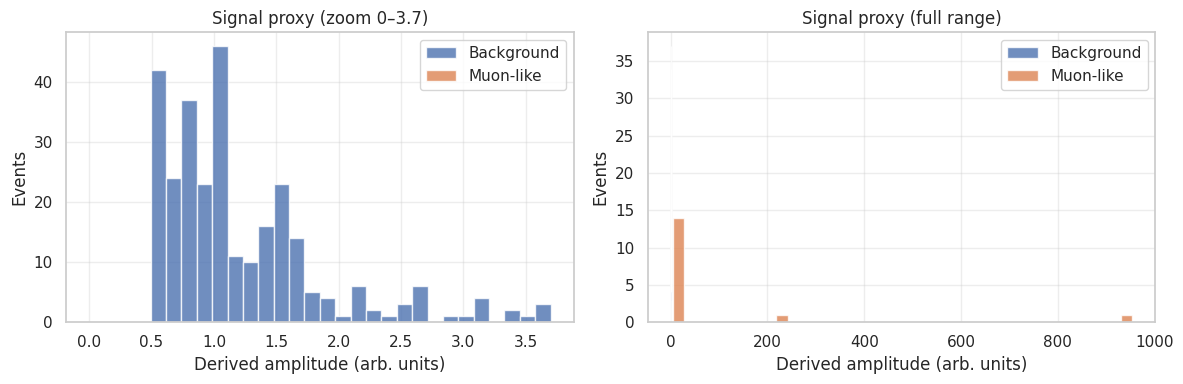

In [104]:
# A16.2 — Signal proxy: zoom + overview (lineal, legible)

fig, axes = plt.subplots(1, 2, figsize=(12,4))

# 1) ZOOM: donde vive el background (ajusta xmax si hace falta)
# zoom upper bound derived from background
zoom_max = bg["signal_proxy"].quantile(CFG["zoom_quantile"])
zoom_max = max(zoom_max, CFG["zoom_min_positive"])


axes[0].hist(bg["signal_proxy"], bins=30, range=(0, zoom_max), alpha=0.8, label="Background")
axes[0].hist(mu["signal_proxy"], bins=30, range=(0, zoom_max), alpha=0.8, label="Muon-like")
axes[0].set_title(f"Signal proxy (zoom 0–{zoom_max})")
axes[0].set_xlabel("Derived amplitude (arb. units)")
axes[0].set_ylabel("Events")
axes[0].legend()
axes[0].grid(True, alpha=0.35)

# 2) OVERVIEW: rango completo para ver cola muon-like
full_max = bg["signal_proxy"].max()
full_max = max(full_max, mu["signal_proxy"].max())

axes[1].hist(bg["signal_proxy"], bins=40, alpha=0.8, label="Background")
axes[1].hist(mu["signal_proxy"], bins=40, alpha=0.8, label="Muon-like")
axes[1].set_title("Signal proxy (full range)")
axes[1].set_xlabel("Derived amplitude (arb. units)")
axes[1].set_ylabel("Events")
axes[1].legend()
axes[1].grid(True, alpha=0.35)

plt.tight_layout()
plt.show()


In [105]:
# A18 — Signal summary report (dataset-agnostic)

N = len(df_renamed)
thr = df_renamed["signal_proxy"].quantile(CFG["muon_like_quantile"])
is_hi = df_renamed["signal_proxy"] >= thr

sat_hg = (df_renamed["adc_high_gain"] == 4095)
sat_rate_all = sat_hg.mean()
sat_rate_hi = sat_hg[is_hi].mean() if is_hi.any() else float("nan")
sat_rate_bg = sat_hg[~is_hi].mean() if (~is_hi).any() else float("nan")

print("=== Signal/ADC summary ===")
print(f"Events: {N}")
print(f"High-signal quantile: q={CFG['muon_like_quantile']:.2f}")
print(f"Threshold (signal_proxy): {thr:.6g}")
print(f"High-signal events: {int(is_hi.sum())} ({is_hi.mean():.3f})")
print("")
print("High-gain ADC saturation (value==4095):")
print(f"- All events: {int(sat_hg.sum())} ({sat_rate_all:.3f})")
print(f"- High-signal: {int((sat_hg & is_hi).sum())} ({sat_rate_hi:.3f})")
print(f"- Background: {int((sat_hg & ~is_hi).sum())} ({sat_rate_bg:.3f})")


=== Signal/ADC summary ===
Events: 304
High-signal quantile: q=0.95
Threshold (signal_proxy): 4.225
High-signal events: 16 (0.053)

High-gain ADC saturation (value==4095):
- All events: 16 (0.053)
- High-signal: 16 (1.000)
- Background: 0 (0.000)


## Conclusions

- The dataset contains 304 single-particle events recorded by a MuNRa-type detector.
- Two ADC-like channels are present, with one channel exhibiting saturation at the 12-bit limit (4095 counts).
- A small subset of events (~5%) shows high signal amplitude and systematic ADC saturation, clearly separated from the background population.
- These high-amplitude events can be robustly identified using a quantile-based threshold on a derived signal proxy, without relying on external labels.

## Limitations and future work

- Absolute physical units (time, voltage, charge) cannot be assigned without firmware-level documentation.
- The dead-time variable appears to be in a different scale than the timestamp and requires clarification before physical live-time calculations.
- Coincidence information is unavailable in this dataset (single-detector configuration).
- Future analysis could include calibration with known sources, coincidence measurements, and comparison with documented MuNRa data formats.
